In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords

In [2]:
#import yelp reviews from root dir
yelp = pd.read_csv(r'reviews_and_ids.csv')

#add text length column
yelp['text length'] = yelp['review'].apply(len)

#print top few rows
yelp.head()

,Unnamed: 0,id,review,rating,text length
0,0,g6AFW-zY0wDvBl9U82g4zg,This place definitely lives up to its 5-star r...,5,151
1,1,g6AFW-zY0wDvBl9U82g4zg,I love love love this cafe! From the delicious...,5,158
2,2,g6AFW-zY0wDvBl9U82g4zg,Love love love love this place! Service is PHE...,5,161
3,3,e41TP5cXZqSrz50xCBJqZw,I have been here over 10 times in the past yea...,5,158
4,4,e41TP5cXZqSrz50xCBJqZw,Insomnia a really nice place for a brunch with...,5,159


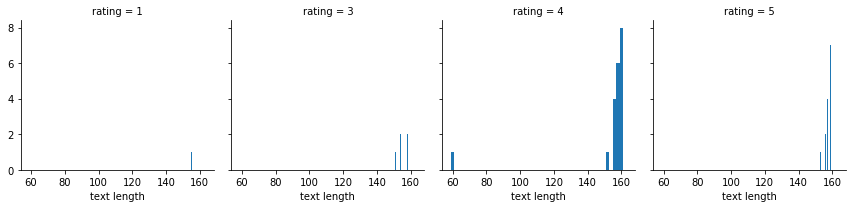

In [3]:
#visualize to explore correlation between length of review and rating
g = sns.FacetGrid(data=yelp, col='rating')
g.map(plt.hist, 'text length', bins=50)

Distribution appears similar, but number of reviews greater for 4/5 stars

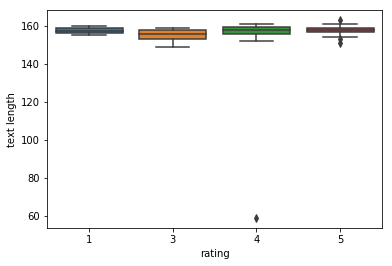

In [4]:
sns.boxplot(x='rating', y='text length', data=yelp)

Evidences length of reviews comparitively

### Text preprocessing

Convert text corpus to vector via bag of words

In [11]:
yelp_class= yelp[(yelp['rating'] == 1) | (yelp['rating'] == 5)]

X = yelp_class['review']
y = yelp_class['rating']

In [12]:
import string

def text_process(text):
    '''
    Takes in a string of text, performs:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)
X = bow_transformer.transform(X)

### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Build and train

Multinomial Naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Predict and evaluate

In [25]:
preds = nb.predict(X_test)

Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[0 0]
 [6 4]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00         0
          5       1.00      0.40      0.57        10

avg / total       1.00      0.40      0.57        10



C:\Users\janei\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Predict random positive review

In [29]:
positive_review = yelp_class['review'][59]
positive_review

"This is a great brunch spot but if you're not going to be there from door opening you've got to expect to wait 30-45min to get in as the place is pretty..."

In [30]:
positive_review_transformed = bow_transformer.transform([positive_review])
positive_review_transformed

<1x348 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [31]:
nb.predict(positive_review_transformed)[0]

5

Predicting random negative

In [38]:
negative_review = yelp_class['review'][22]
negative_review

'look no further if you need another reason to make your own sandwich at home.\r\npls. get the smoking staff away from the view of the customers. wash your...'

In [39]:
negative_review_transformed = bow_transformer.transform([negative_review])
negative_review_transformed

<1x348 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [40]:
nb.predict(negative_review_transformed)[0]

1

Predicting another random negative

In [52]:
another_negative_review = yelp_class['review'][48]
another_negative_review

"We came here on a weekend for lunch. The space is small, casual and cute. There weren't any other customers there, but they were quite busy with online..."

In [53]:
another_negative_review_transformed = bow_transformer.transform([another_negative_review])
another_negative_review_transformed

<1x348 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [58]:
nb.predict(another_negative_review_transformed)[0]

1

In [61]:
positive_review_ = 'Wow my friends and I got our food really quickly, and for pretty cheap'
positive_review_transformed = bow_transformer.transform([positive_review_])
nb.predict(positive_review_transformed)[0]

5